#### 一、核心概念  
K近邻（KNN）是一种**基于实例的监督学习算法**，核心用于分类和回归任务。其核心思想是：**“物以类聚”**，即新样本的类别/值由其周围最近的K个训练样本（近邻）的类别/值决定。  

- **关键术语**：  
  - **K值**：近邻的数量（如K=3表示取最近的3个样本）；  
  - **距离度量**：衡量样本间相似性的指标（如欧氏距离、曼哈顿距离）；  
  - **投票机制**：分类任务中，新样本类别为K个近邻中出现次数最多的类别（多数投票）；回归任务中，为K个近邻的平均值。  


#### 二、核心原理  
KNN的工作流程简单直接，无需训练过程（“惰性学习”），仅在预测时计算新样本与所有训练样本的距离：  

1. **确定K值**：选择近邻数量（如K=5）；  
2. **计算距离**：计算新样本与所有训练样本的距离（常用欧氏距离）；  
3. **找近邻**：选取距离最近的K个训练样本；  
4. **投票/平均**：分类任务取K个样本中最多的类别，回归任务取平均值作为预测结果。  


#### 三、距离度量  
常用的距离度量方法：  

| 距离类型       |  公式（两个d维样本$x=(x_1,...,x_d)$和$y=(y_1,...,y_d)$） | 适用场景         |
|------------|------------------------------------------------|--------------|
| 欧氏距离       | $ \sqrt{\sum_{i=1}^d (x_i - y_i)^2} $          | 连续特征，各维度量纲一致 |
| 曼哈顿距离      | $ \sum_{i=1}^d                                 | x_i - y_i    | $ | 高维数据（如文本），抗噪声   |
| 余弦相似度      | $ \frac{x·y}{                                  |              |x||·||y||} $     | 关注方向而非大小（如文本、图像） |


#### 四、K值的影响  
- **K值过小**：模型容易过拟合（受噪声样本影响大，决策边界复杂）；  
- **K值过大**：模型容易欠拟合（近邻包含过多其他类样本，决策边界模糊）；  
- **经验法则**：K通常取奇数（避免投票平局），通过交叉验证选择最优K（如5、7、9）。  


#### 五、适用场景与优缺点  
- **适用场景**：  
  - 小到中等规模数据集（大数据集计算慢）；  
  - 分类任务（如手写数字识别、鸢尾花分类）；  
  - 回归任务（如房价预测）；  
  - 特征维度较低的场景（高维数据需降维）。  

- **优点**：  
  1. 简单直观，易于实现；  
  2. 无需训练过程，新样本可直接预测；  
  3. 对异常值不敏感（当K较大时）。  

- **缺点**：  
  1. 预测速度慢（需计算与所有训练样本的距离）；  
  2. 对高维数据效果差（“维度灾难”）；  
  3. 对不平衡数据敏感（多数类样本易主导投票）；  
  4. 受距离度量和K值影响大。  


#### 六、代码实例（3个独立Python文件）  


##### 1. 简洁版：手撕KNN分类（欧氏距离）  

K=3时，测试集准确率：1.0000
K=5时，测试集准确率：1.0000
K=7时，测试集准确率：1.0000


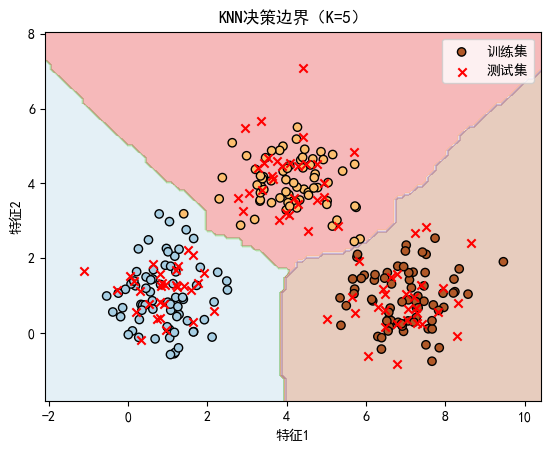

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# 解决中文显示问题
matplotlib.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]
matplotlib.rcParams["axes.unicode_minus"] = False

# 1. 生成模拟数据（二维特征，3个类别）
np.random.seed(42)
# 类别0：均值(1,1)
X0 = np.random.normal(loc=[1, 1], scale=0.8, size=(100, 2))
# 类别1：均值(4,4)
X1 = np.random.normal(loc=[4, 4], scale=0.8, size=(100, 2))
# 类别2：均值(7,1)
X2 = np.random.normal(loc=[7, 1], scale=0.8, size=(100, 2))

X = np.vstack([X0, X1, X2])
y = np.hstack([np.zeros(100), np.ones(100), np.full(100, 2)])  # 标签0,1,2

# 2. 划分训练集和测试集
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42, stratify=y
)

# 3. KNN分类算法实现
# noinspection PyShadowingNames
class KNNClassifier:
    def __init__(self, k=5, distance_metric='euclidean'):
        self.k = k  # 近邻数量
        self.distance_metric = distance_metric  # 距离度量
        self.X_train = None
        self.y_train = None

    def fit(self, X, y):
        """KNN无需训练，仅存储训练数据"""
        self.X_train = X
        self.y_train = y

    def _compute_distance(self, x):
        """计算单个样本x与所有训练样本的距离"""
        if self.distance_metric == 'euclidean':
            # 欧氏距离：sqrt(sum((x - x_train)^2))
            return np.sqrt(np.sum((self.X_train - x) **2, axis=1))
        elif self.distance_metric == 'manhattan':
            # 曼哈顿距离：sum(|x - x_train|)
            return np.sum(np.abs(self.X_train - x), axis=1)
        else:
            raise ValueError("不支持的距离度量方式")

    def predict(self, X):
        """预测样本类别"""
        y_pred = [self._predict_sample(x) for x in X]
        return np.array(y_pred)

    def _predict_sample(self, x):
        """预测单个样本的类别"""
        # 1. 计算距离
        distances = self._compute_distance(x)
        # 2. 按距离排序，取前k个近邻的索引
        k_indices = np.argsort(distances)[:self.k]
        # 3. 多数投票（取出现次数最多的类别）
        k_nearest_labels = self.y_train[k_indices]
        most_common = np.bincount(k_nearest_labels.astype(int)).argmax()
        return most_common

# 4. 训练与评估（对比不同K值）
k_values = [3, 5, 7]
for k in k_values:
    model = KNNClassifier(k=k)
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"K={k}时，测试集准确率：{accuracy:.4f}")

# 5. 可视化决策边界（K=5）
# noinspection PyShadowingNames
def plot_boundary(model):
    h = 0.1  # 网格步长
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    # 生成网格点并预测
    X_grid = np.c_[xx.ravel(), yy.ravel()]
    Z = model.predict(X_grid)
    Z = Z.reshape(xx.shape)
    
    # 绘制决策边界和样本点
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train, cmap=plt.cm.Paired, edgecolor='k', label="训练集")
    plt.scatter(X_test[:, 0], X_test[:, 1], c='r', marker='x', label="测试集")  # 修复非填充标记颜色警告
    plt.xlabel("特征1")
    plt.ylabel("特征2")
    plt.title(f"KNN决策边界（K={model.k}）")
    plt.legend()
    plt.show()

# 绘制K=5时的决策边界
best_model = KNNClassifier(k=5)
best_model.fit(X_train, y_train)
plot_boundary(best_model)


##### 2. 简洁版：sklearn实现KNN（分类与回归）  

=== KNN分类任务 ===
KNN分类准确率：0.7556


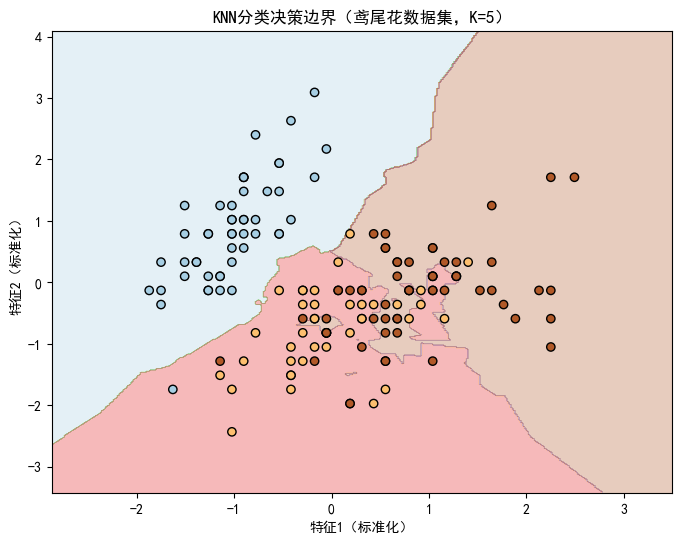

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (accuracy_score, mean_squared_error, r2_score)

# 解决中文显示问题
matplotlib.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]
matplotlib.rcParams["axes.unicode_minus"] = False

# 1. KNN分类（鸢尾花数据集）
# noinspection PyShadowingNames
def knn_classification():
    # 加载数据
    iris = datasets.load_iris()
    X = iris.data[:, :2]  # 取前2个特征
    y = iris.target

    # 数据标准化（KNN对特征尺度敏感）
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42, stratify=y
    )

    # 训练KNN分类器（K=5）
    knn_clf = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
    knn_clf.fit(X_train, y_train)

    # 评估
    y_pred = knn_clf.predict(X_test)
    accuracy = accuracy_score(y_test, y_pred)
    print(f"KNN分类准确率：{accuracy:.4f}")

    # 可视化决策边界
    h = 0.02
    x_min, x_max = X_scaled[:, 0].min() - 1, X_scaled[:, 0].max() + 1
    y_min, y_max = X_scaled[:, 1].min() - 1, X_scaled[:, 1].max() + 1
    # 1) np.arange() 用于创建一个等差数组
    # 2) np.meshgrid() 用于生成二维或多维的网格坐标矩阵。
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    
    Z = knn_clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    
    plt.figure(figsize=(8, 6))
    # 1) plt.contourf() 用于绘制填充的等高线图。
    # 2) cmap=plt.cm.Paired：cmap 是颜色映射参数，用于指定不同数值对应的颜色。plt.cm.Paired 是一种预
    # 定义的颜色映射，会用不同颜色区分不同的类别。
    plt.contourf(xx, yy, Z, alpha=0.3, cmap=plt.cm.Paired)
    plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=y, cmap=plt.cm.Paired, edgecolor='k')
    plt.xlabel("特征1（标准化）")
    plt.ylabel("特征2（标准化）")
    plt.title("KNN分类决策边界（鸢尾花数据集，K=5）")
    plt.show()

print("=== KNN分类任务 ===")
knn_classification()


=== KNN回归任务 ===
KNN回归MSE：0.7055
KNN回归R²：0.4625


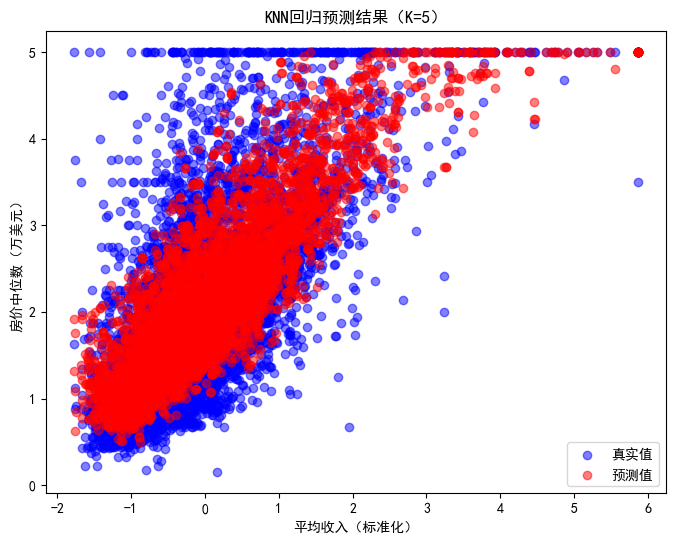

In [2]:
# 2. KNN回归（波士顿房价数据集，用加利福尼亚房价替代）
# noinspection PyShadowingNames
def knn_regression():
    # 加载数据（波士顿房价已移除，用加利福尼亚房价替代）
    california = datasets.fetch_california_housing()
    X = california.data[:, :2]  # 取前2个特征（平均收入、房龄）
    y = california.target  # 房价中位数

    # 数据标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42
    )

    # 训练KNN回归器（K=5）
    knn_reg = KNeighborsRegressor(n_neighbors=5, metric='manhattan')
    knn_reg.fit(X_train, y_train)

    # 评估
    y_pred = knn_reg.predict(X_test)
    mse = mean_squared_error(y_test, y_pred)
    r2 = r2_score(y_test, y_pred)
    print(f"KNN回归MSE：{mse:.4f}")
    print(f"KNN回归R²：{r2:.4f}")

    # 可视化预测结果（第一特征与房价的关系）
    plt.figure(figsize=(8, 6))
    plt.scatter(X_test[:, 0], y_test, color='blue', label='真实值', alpha=0.5)
    plt.scatter(X_test[:, 0], y_pred, color='red', label='预测值', alpha=0.5)
    plt.xlabel("平均收入（标准化）")
    plt.ylabel("房价中位数（万美元）")
    plt.title("KNN回归预测结果（K=5）")
    plt.legend()
    plt.show()
    
print("\n=== KNN回归任务 ===")
knn_regression()


##### 3. 全面版：sklearn实现（参数调优+性能对比）  

=== KNN分类参数调优 ===
分类任务最优参数： {'metric': 'manhattan', 'n_neighbors': 3, 'weights': 'uniform'}
最优交叉验证F1：0.9821

测试集评估：
准确率：0.9649
F1分数：0.9725
AUC：0.9803

混淆矩阵：
[[ 59   5]
 [  1 106]]


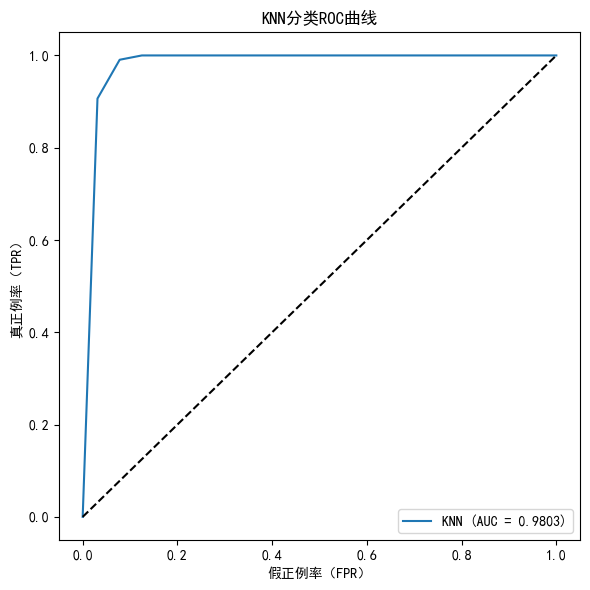

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
from sklearn.datasets import load_breast_cancer, fetch_california_housing
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import (
    accuracy_score, f1_score, roc_auc_score, roc_curve,
    mean_squared_error, r2_score, confusion_matrix
)

# 解决中文显示问题
matplotlib.rcParams["font.family"] = ["SimHei", "Microsoft YaHei"]
matplotlib.rcParams["axes.unicode_minus"] = False

# 1. KNN分类调优（乳腺癌数据集）
# noinspection PyShadowingNames
def knn_classification_tuning():
    # 加载数据
    data = load_breast_cancer()
    X, y = data.data, data.target

    # 标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42, stratify=y
    )

    # 简化参数网格，减少计算量
    param_grid = {
        'n_neighbors': [3, 5, 7],  # K值范围
        # 'weights' 参数用于指定近邻的权重计算方式
        # 'uniform': 所有近邻的权重相等，在投票时具有相同的影响力
        # 'distance': 近邻的权重与距离成反比，即距离越近的样本权重越大
        'weights': ['uniform', 'distance'],
        # 'metric' 参数用于指定计算样本间距离的度量方法
        # 'euclidean': 欧氏距离，常用于连续特征且各维度量纲一致的场景
        # 'manhattan': 曼哈顿距离，适用于高维数据，具有一定的抗噪声能力
        'metric': ['euclidean', 'manhattan'],  # 减少距离度量类型
    }

    # 网格搜索+3折交叉验证（减少折数加快速度）
    grid_search = GridSearchCV(
        KNeighborsClassifier(),
        param_grid,
        cv=3,
        scoring='f1',
        n_jobs=-1  # 使用所有可用核心
    )
    grid_search.fit(X_train, y_train)

    print("分类任务最优参数：", grid_search.best_params_)
    print(f"最优交叉验证F1：{grid_search.best_score_:.4f}")

    # 最佳模型评估
    best_clf = grid_search.best_estimator_
    y_pred = best_clf.predict(X_test)
    y_pred_proba = best_clf.predict_proba(X_test)[:, 1]

    print("\n测试集评估：")
    print(f"准确率：{accuracy_score(y_test, y_pred):.4f}")
    print(f"F1分数：{f1_score(y_test, y_pred):.4f}")
    print(f"AUC：{roc_auc_score(y_test, y_pred_proba):.4f}")
    print("\n混淆矩阵：")
    print(confusion_matrix(y_test, y_pred))

    # 绘制ROC曲线
    fpr, tpr, _ = roc_curve(y_test, y_pred_proba)  # roc_curve 用于计算 ROC曲线 的相关指标。
    plt.figure(figsize=(6, 6))
    plt.plot(fpr, tpr, label=f"KNN (AUC = {roc_auc_score(y_test, y_pred_proba):.4f})")
    plt.plot([0, 1], [0, 1], 'k--')
    plt.xlabel("假正例率（FPR）")
    plt.ylabel("真正例率（TPR）")
    plt.title("KNN分类ROC曲线")
    plt.legend()
    plt.tight_layout()
    plt.show()

try:
    print("=== KNN分类参数调优 ===")
    knn_classification_tuning()
except Exception as e:
    print(f"分类任务出错：{str(e)}")


=== KNN回归参数调优 ===

回归任务最优参数： {'metric': 'manhattan', 'n_neighbors': 10, 'weights': 'distance'}
最优交叉验证MSE：0.3766

测试集评估：
MSE：0.3581
R²：0.7272


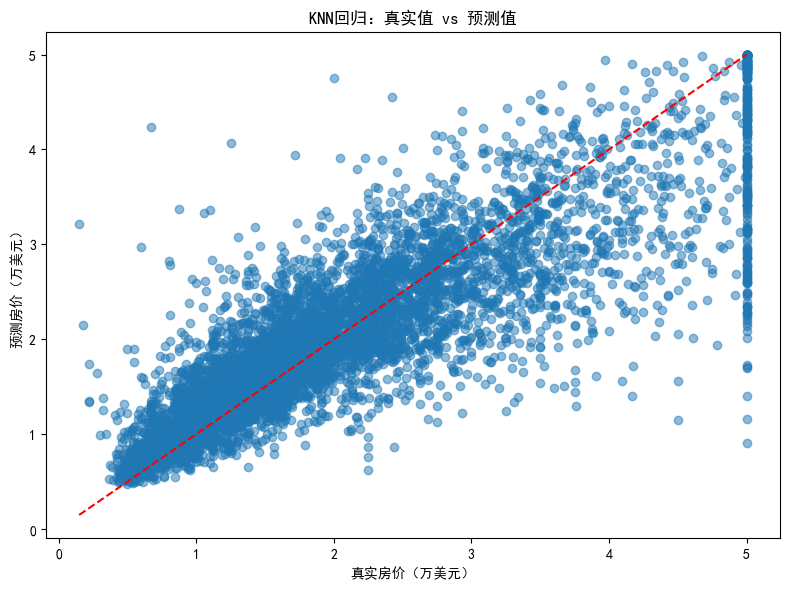

In [2]:
# 2. KNN回归调优（房价数据集）
# noinspection PyShadowingNames
def knn_regression_tuning():
    # 加载数据并标准化
    data = fetch_california_housing()
    X, y = data.data, data.target

    # 标准化
    scaler = StandardScaler()
    X_scaled = scaler.fit_transform(X)

    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42
    )

    # 简化参数网格
    param_grid = {
        'n_neighbors': [5, 10],  # 减少K值范围
        'weights': ['uniform', 'distance'],
        'metric': ['euclidean', 'manhattan']
    }

    # 网格搜索
    grid_search = GridSearchCV(
        KNeighborsRegressor(),
        param_grid,
        cv=3,  # 3折交叉验证
        scoring='neg_mean_squared_error',
        n_jobs=-1
    )
    grid_search.fit(X_train, y_train)

    print("\n回归任务最优参数：", grid_search.best_params_)
    print(f"最优交叉验证MSE：{-grid_search.best_score_:.4f}")

    # 最佳模型评估
    best_reg = grid_search.best_estimator_
    y_pred = best_reg.predict(X_test)
    print("\n测试集评估：")
    print(f"MSE：{mean_squared_error(y_test, y_pred):.4f}")
    print(f"R²：{r2_score(y_test, y_pred):.4f}")

    # 可视化预测值与真实值
    plt.figure(figsize=(8, 6))
    plt.scatter(y_test, y_pred, alpha=0.5)
    plt.plot([y.min(), y.max()], [y.min(), y.max()], 'r--')  # 理想线
    plt.xlabel("真实房价（万美元）")
    plt.ylabel("预测房价（万美元）")
    plt.title("KNN回归：真实值 vs 预测值")
    plt.tight_layout()
    plt.show()
    
try:
    print("\n=== KNN回归参数调优 ===")
    knn_regression_tuning()
except Exception as e:
    print(f"回归任务出错：{str(e)}")


=== K值影响分析 ===


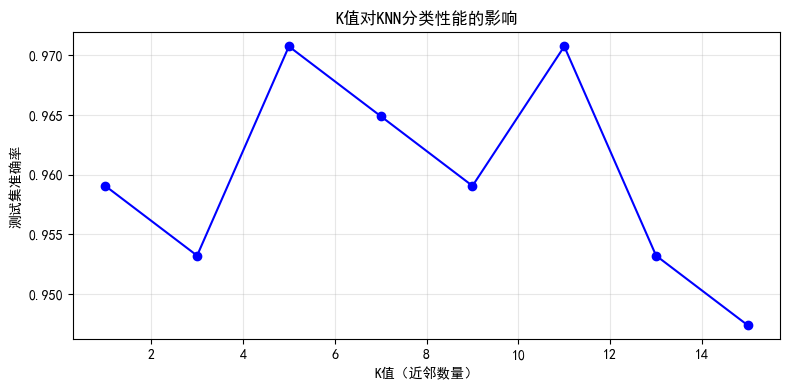

In [3]:
# 3. 不同K值对性能的影响
# noinspection PyShadowingNames
def plot_k_influence():
    # 加载数据
    data = load_breast_cancer()
    X, y = data.data, data.target

    # 标准化
    X_scaled = StandardScaler().fit_transform(X)

    # 划分数据集
    X_train, X_test, y_train, y_test = train_test_split(
        X_scaled, y, test_size=0.3, random_state=42, stratify=y
    )

    # 测试不同K值（减少范围）
    k_values = range(1, 16, 2)  # 1,3,...,15
    accuracies = []
    for k in k_values:
        clf = KNeighborsClassifier(n_neighbors=k)
        clf.fit(X_train, y_train)
        accuracies.append(accuracy_score(y_test, clf.predict(X_test)))

    # 绘图
    plt.figure(figsize=(8, 4))
    plt.plot(k_values, accuracies, 'o-', color='b')
    plt.xlabel("K值（近邻数量）")
    plt.ylabel("测试集准确率")
    plt.title("K值对KNN分类性能的影响")
    plt.grid(alpha=0.3)
    plt.tight_layout()
    plt.show()

try:
    print("\n=== K值影响分析 ===")
    plot_k_influence()
except Exception as e:
    print(f"K值分析出错：{str(e)}")   

### 总结  
KNN是一种直观易懂的“惰性学习”算法，核心依赖近邻的投票或平均进行预测。实践中需注意：  
1. **特征标准化**：KNN对特征尺度敏感，必须先标准化；  
2. **K值选择**：过小易过拟合，过大易欠拟合，需通过交叉验证确定；  
3. **距离度量**：连续特征常用欧氏距离，高维数据可用曼哈顿距离或余弦相似度；  
4. **效率优化**：大数据集可采用KD树、Ball树加速近邻搜索，或减少特征维度。  